In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from plotnine import *
from umap import UMAP

In [2]:
english_alphabet = set(
    ['w_s', 'w_e', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
     'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
     'x', 'y', 'z']
)

In [3]:
df = pd.read_csv("../ted_en-20160408_full.txt", sep="\t")
df['chunk_text'] = df['chunk_text'].apply(lambda x: x.lower())
df.head()
all_words = []
for ix, row in df.iterrows():
    words = word_tokenize(row['chunk_text'])
    all_words += [word for word in words]

In [4]:
w2v = Word2Vec(all_words, size=10)

### Visualize these two models using UMAP to see where the letters sit relative to each other

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


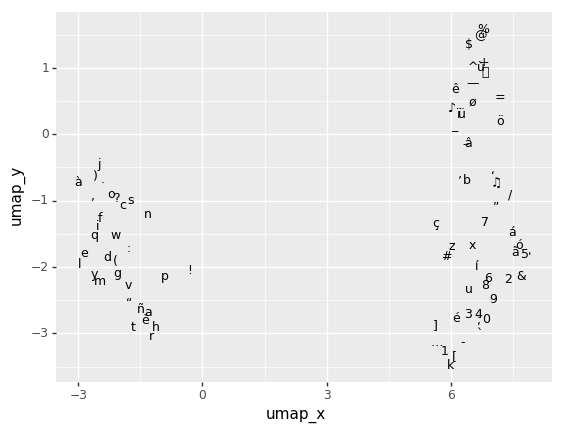

<ggplot: (-9223372036562938017)>


In [7]:
umap = UMAP(metric='cosine')
umap_vecs = umap.fit_transform(w2v.wv.vectors)
umap_df = pd.DataFrame(umap_vecs, columns=['umap_x', 'umap_y'])
umap_df['character'] = w2v.wv.vocab
print(ggplot(umap_df, aes("umap_x", "umap_y", label='character'))
      + geom_text(position=position_jitter(), size=9))

### Parametrically vary the embedding dimensionality

Feel free to test other parameters, such as whether to use skip-gram or CBOW (`sg=1` and `sg=0` respectively) or change the number of negative samples (e.g. change the `negative` argument to e.g. `negative=10`).

In [9]:
w2v_16 = Word2Vec(all_words, size=16)
w2v_24 = Word2Vec(all_words, size=24)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


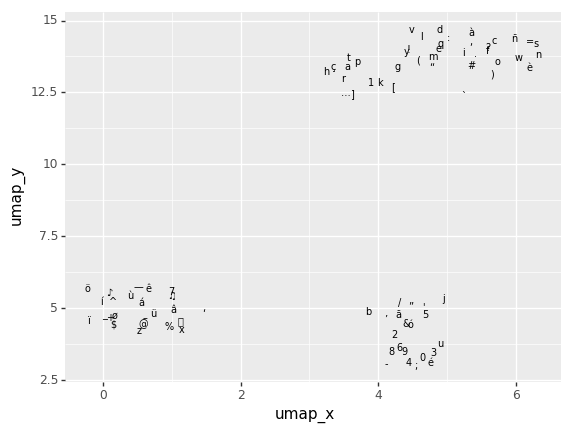

<ggplot: (-9223372036559180607)>


In [10]:
umap2 = UMAP(metric='cosine')
umap2_vecs = umap2.fit_transform(w2v_16.wv.vectors)
umap2_df = pd.DataFrame(umap2_vecs, columns=['umap_x', 'umap_y'])
umap2_df['character'] = w2v_16.wv.vocab
print(ggplot(umap2_df, aes("umap_x", "umap_y", label='character'))
      + geom_text(position=position_jitter(), size=7))

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


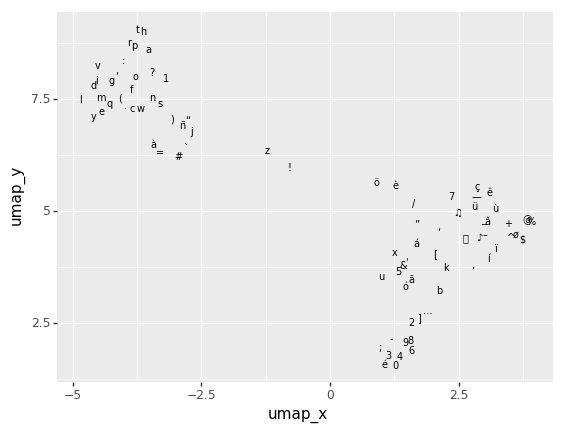

<ggplot: (313893054)>


In [11]:
umap3 = UMAP(metric='cosine')
umap3_vecs = umap3.fit_transform(w2v_24.wv.vectors)
umap3_df = pd.DataFrame(umap3_vecs, columns=['umap_x', 'umap_y'])
umap3_df['character'] = w2v_24.wv.vocab
print(ggplot(umap3_df, aes("umap_x", "umap_y", label='character'))
      + geom_text(position=position_jitter(), size=7))

### Other approaches may also be viable. Try different things in the cells below!